In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [134]:
class KMeans:
    def __init__(self):
        self.color = ["r","b","c","m","y","g"]   #クラスタの色
        self.k = 2                               #クラスタ数
        self.node = 200                           #データ数
        self.J_x = []
        self.J_y = []
        self.J = []
        self.J_n = []
        self.l = 0.0
        
    
    def dataset(self,ave1,ave2,cov1,cov2,node):
        #平均
        mu1 = [ave1,ave1]
        mu2 = [ave2,ave2]
        #共分散
        cov = [[cov1,cov2],[cov2,cov1]]
        #データの生成
        x1,y1 = np.random.multivariate_normal(mu1,cov,node).T
        x2,y2 = np.random.multivariate_normal(mu2,cov,node).T
        self.X = np.append(x1,x2)
        self.Y = np.append(y1,y2)
        
    def cluster_center(self,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6):
        #クラスター中心の初期値
        self.u_x = [x1,x2,x3,x4,x5,x6]
        self.u_y = [y1,y2,y3,y4,y5,y6]
        
    def param_init(self):
        self.count = []
        self.sum = []
        self.t =[]
        self.clus = []
        self.b = []
        self.p=0
        self.q=0
        
    def distance(self,X,Y,u_x,u_y,k):
        #変数の初期化
        self.param_init()
        
        #配列の準備
        for i in range(0,k):
            self.b.append([u_x[i],u_y[i]])
            self.count.append(0)
            self.sum.append([0.0,0.0])
            self.t.append(0)
        self.sum = np.array(self.sum)
        
        for i,j in zip(X,Y):
            distance = []
            a = np.array([i, j])
            
            #各中心と各データの二乗距離
            for i in range(0,k):
                distance.append(np.linalg.norm(self.b[i] - a))
            
            #クラス分け
            self.clus.append(self.color[distance.index(min(distance))])
            self.count[distance.index(min(distance))] += 1
            self.sum[distance.index(min(distance))] += a
            
        #Eステップ後の歪み尺度
        self.distortion_measure(k,u_x,u_y,X,Y,self.clus)
            
        #クラスタ中心の更新
        for i in range(0,k):
            self.t[i] = self.sum[i]/self.count[i]
        for i in range(0,2):
            for j in range(0,k):
                self.u_x[j] = self.t[j][i]
                self.u_y[j] = self.t[j][i]
                
        #Mステップ後の歪み尺度
        self.distortion_measure(k,u_x,u_y,X,Y,self.clus)
        
    def fig_plot_cluster(self,X,Y,u_x,u_y,k,clus):
        #新しい描画を開始
        plt.figure()
        plt.scatter(X,Y,c=clus,s=20,marker="o",edgecolors='k')
        plt.scatter(u_x[0:k],u_y[0:k],c=["r","b","c","m","y","g"],s=100,marker="x",edgecolors='k')
        self.distance(X,Y,u_x,u_y,k)
        
    def distortion_measure(self,k,u_x,u_y,X,Y,clus):
        #歪み尺度
        for i in range(k):
            self.count_n = 0
            sum = 0
            for x,y in zip(X,Y):
                if self.color[i] == self.clus[self.count_n]:
                    sum += (pow((x - u_x[i]),2) + pow((y - u_y[i]),2))
                    
                self.count_n += 1
        self.l += 0.5
        self.J.append(sum)
        self.J_n.append(self.l)
           
    def fig_plot_distortion(self,J,J_n):
        #新しい描画を開始
        plt.figure()
        plt.title("distortion measure")
        plt.ylabel("J")
        plt.xlabel("times")
        plt.plot(J_n,J,marker = "o")

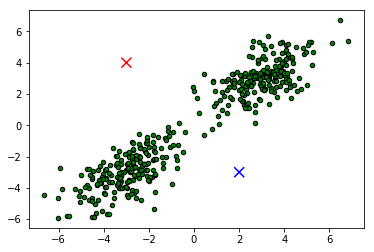

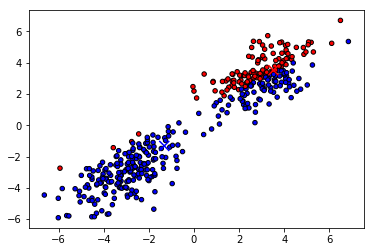

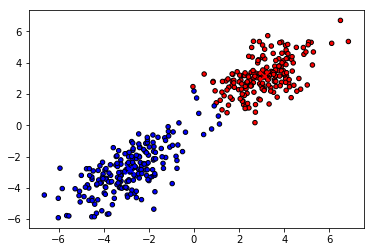

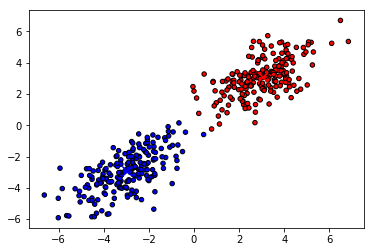

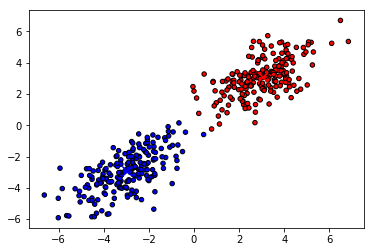

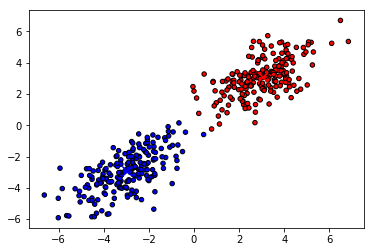

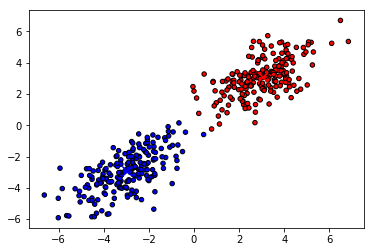

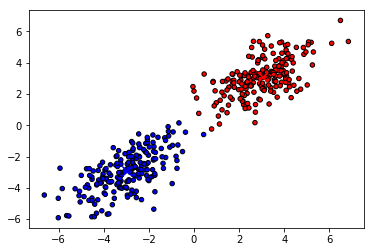

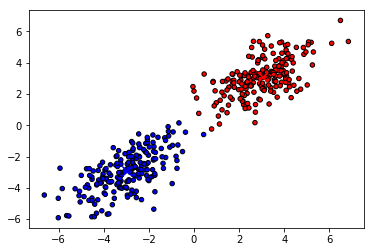

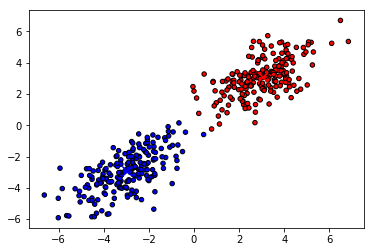

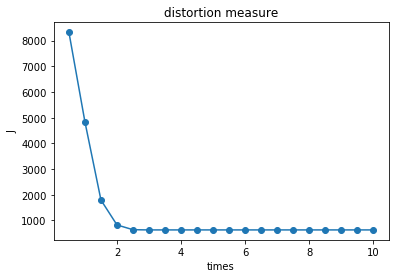

In [135]:
if __name__ == '__main__':
    km = KMeans()
    km.dataset(-3,3,1.5,1,km.node)
    km.cluster_center(-3,4,2,-3,0,-4,1,3,4,-5,6,6)
    #km.fig_plot_(km.X,km.Y,km.u_x,km.u_y,km.k,km.color[5])
    for i in range(10):
        if i == 0: c = km.color[5]
        else: c = km.clus
        km.fig_plot_cluster(km.X,km.Y,km.u_x,km.u_y,km.k,c)
    km.fig_plot_distortion(km.J,km.J_n)